In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
# from keras.layers import Dense, Dropout, Activation, LSTM, Convolution1D, MaxPooling1D, Flatten
# from keras.models import Sequential
import matplotlib.pyplot as plt

%matplotlib inline
from torchbearer import Trial
import os

In [2]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchbearer
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision.datasets import MNIST
from torchbearer import Trial
import torchvision.transforms as transforms

In [3]:
%ls

 驱动器 E 中的卷是 软件
 卷的序列号是 000B-4453

 E:\git\MSc-dissertation 的目录

2019/08/12  10:17    <DIR>          .
2019/08/12  10:17    <DIR>          ..
2019/08/12  09:18    <DIR>          .ipynb_checkpoints
2019/08/05  13:58           368,007 ^DJI.csv
2019/08/05  13:58           104,540 ^GSPC.csv
2019/08/05  13:58           167,205 ^GSPC_2011_06_01-2019_06_01.csv
2019/08/12  09:19    <DIR>          __pycache__
2019/08/05  13:58            41,117 1d_conv.weights
2019/08/05  13:58           382,435 5_1_CNN-Copy1.ipynb
2019/08/05  13:58           335,219 Archive.zip
2019/08/05  13:58               658 CBOE yearly 04-18.csv
2019/08/05  13:58    <DIR>          data
2019/08/05  13:58           189,414 EUR_GBP 05-16.csv
2019/08/05  13:58           189,007 EUR_JPY 05-16.csv
2019/08/05  13:58           189,396 EUR_USD 05-16.csv
2019/08/05  13:58           189,370 GBP_JPY 05-16.csv
2019/08/05  13:58           189,425 GBP_USD 05-16.csv
2019/08/05  13:58             8,500 misc_functions.py
2019/08/08  21:33 

In [4]:
datapath = os.path.join(os.getcwd(), 'data')
datapath

'E:\\git\\MSc-dissertation\\data'

In [5]:
%ls data

 驱动器 E 中的卷是 软件
 卷的序列号是 000B-4453

 E:\git\MSc-dissertation\data 的目录

2019/08/05  13:58    <DIR>          .
2019/08/05  13:58    <DIR>          ..
2019/08/05  13:58           178,424 ^TNX.csv
2019/08/05  13:58           193,366 ^VIX.csv
2019/08/05  13:58               658 CBOE yearly 04-18.csv
2019/08/05  13:58           189,414 EUR_GBP 05-16.csv
2019/08/05  13:58           189,007 EUR_JPY 05-16.csv
2019/08/05  13:58           189,396 EUR_USD 05-16.csv
2019/08/05  13:58           189,370 GBP_JPY 05-16.csv
2019/08/05  13:58           189,425 GBP_USD 05-16.csv
2019/08/05  13:58           206,054 SP500 05-16.csv
               9 个文件      1,525,114 字节
               2 个目录 22,320,795,648 可用字节


# get the data

In [6]:
data = []
for i, file in enumerate(os.listdir(datapath)):
    data.append(pd.read_csv(os.path.join(datapath,file))) 
for i in range(len(data)):
    print(os.listdir(datapath)[i], '\n', data[i].tail())

CBOE yearly 04-18.csv 
    Change Date     Rate (%)
32   13-Dec-17  1.25 - 1.50
33   21-Mar-18  1.50 - 1.75
34   13-Jun-18  1.75 - 2.00
35   26-Sep-18  2.00 - 2.25
36   19-Dec-18  2.25 - 2.50
EUR_GBP 05-16.csv 
               Date   Price    Open    High     Low Change %
3125  Jan 07, 2005  0.6981  0.7022  0.7049  0.6971   -0.64%
3126  Jan 06, 2005  0.7026  0.7041  0.7055  0.7016   -0.24%
3127  Jan 05, 2005  0.7043  0.7049  0.7073  0.7021   -0.17%
3128  Jan 04, 2005  0.7055  0.7069  0.7076  0.7044   -0.20%
3129  Jan 03, 2005  0.7069  0.7058  0.7097  0.7038   -0.01%
EUR_JPY 05-16.csv 
               Date   Price    Open    High     Low Change %
3125  Jan 07, 2005  136.80  138.23  138.74  136.44   -1.16%
3126  Jan 06, 2005  138.41  138.03  138.69  137.85    0.28%
3127  Jan 05, 2005  138.03  138.85  139.02  137.68   -0.58%
3128  Jan 04, 2005  138.83  138.34  139.05  137.77    0.38%
3129  Jan 03, 2005  138.31  139.07  139.31  138.06   -0.40%
EUR_USD 05-16.csv 
               Date   Price  

In [7]:
#TNX: COBE 10 years interest rate
#VIX: COBE volitility index
for i in range(len(data)):
    print(len(data[i]))

37
3130
3130
3130
3130
3130
3021
3021
3021


In [8]:
# take TNX, VIX and SP500 and prepocessing
sp500 = data[-3]
tnx = data[-2]
vix = data[-1]

#take only some columns
sp500= sp500.values[:, 1:5]
print (sp500.shape)
tnx= tnx.values[:, 1:5]
print (tnx.shape)
vix= vix.values[:, 1:5]
print (vix.shape)

(3021, 4)
(3021, 4)
(3021, 4)


In [9]:
# split sample X and target y
X = np.zeros((3, 3020, 4))
X[0,:,:] = sp500[:3020, :]
X[1,:,:] = tnx[:3020, :]
X[2,:,:] = vix[:3020, :]

y = np.zeros((3,3020))
y[0,:] = sp500[1:, 0] #price
y[1,:] = tnx[1:, 3]
y[2,:] = vix[1:, 3]

print(X.shape, y.shape)

(3, 3020, 4) (3, 3020)


In [10]:
print(sp500[:3020, :], sp500[1:, 0])

[[1202.079956 1211.920044 1217.800049 1200.319946]
 [1188.050049 1202.079956 1205.839966 1185.390015]
 [1183.73999 1188.050049 1192.72998 1183.719971]
 ...
 [2268.8798829999996 2266.22998 2273.820068 2266.149902]
 [2249.919922 2270.22998 2271.310059 2249.110107]
 [2249.26001 2249.5 2254.51001 2244.560059]] [1188.050049 1183.73999 1187.890015 ... 2249.919922 2249.26001 2238.830078]


In [11]:
temp1 = X[0, :, 0]
temp2 = X[1, :, 3]
temp3 = X[2, :, 3]
X_temp = np.array([temp1, temp2, temp3]).T
X = X_temp

y = y[0,:]
print(X.shape, y.shape)

(3020, 3) (3020,)


In [12]:
print(temp1, temp2, temp3)
print(X, y)

[1202.079956 1188.050049 1183.73999  ... 2268.879883 2249.919922
 2249.26001 ] [4.22  4.283 4.277 ... 2.563 2.506 2.477] [14.08 13.98 14.09 ... 11.99 12.95 13.37]
[[1202.079956    4.22       14.08    ]
 [1188.050049    4.283      13.98    ]
 [1183.73999     4.277      14.09    ]
 ...
 [2268.879883    2.563      11.99    ]
 [2249.919922    2.506      12.95    ]
 [2249.26001     2.477      13.37    ]] [1188.050049 1183.73999  1187.890015 ... 2249.919922 2249.26001
 2238.830078]


In [13]:
test_dict = {'sp500': X[:,0], 'tnx':X[:,1], 'vix':X[:,2], 'y':y}
test_dict_df = pd.DataFrame(data=test_dict)

test_dict_df.tail()

,sp500,tnx,vix,y
3015,2260.959961,2.553,11.43,2263.790039
3016,2263.790039,2.543,11.44,2268.879883
3017,2268.879883,2.563,11.99,2249.919922
3018,2249.919922,2.506,12.95,2249.260010
3019,2249.260010,2.477,13.37,2238.830078


In [14]:
test_dict_df= test_dict_df.dropna(axis=0)#drop rows which may contain missing values
test_dict_df.tail()

,sp500,tnx,vix,y
3015,2260.959961,2.553,11.43,2263.790039
3016,2263.790039,2.543,11.44,2268.879883
3017,2268.879883,2.563,11.99,2249.919922
3018,2249.919922,2.506,12.95,2249.260010
3019,2249.260010,2.477,13.37,2238.830078


# building the binary target

In [15]:
# -1 --> tomorrow goes down 
# 0 --> tomorrow goes up

In [16]:
# initialising
test_dict_df['forecasting'] = 0
test_dict_df.tail()


,sp500,tnx,vix,y,forecasting
3015,2260.959961,2.553,11.43,2263.790039,0
3016,2263.790039,2.543,11.44,2268.879883,0
3017,2268.879883,2.563,11.99,2249.919922,0
3018,2249.919922,2.506,12.95,2249.260010,0
3019,2249.260010,2.477,13.37,2238.830078,0


In [17]:
df = test_dict_df
# if y > sp500: predict as go up
# else predict as go down

for i in df.index:
    if df['y'][i] > df['sp500'][i]:  # go up?
        df.at[i, 'forecasting'] = 1
    else:
        df.at[i, 'forecasting'] = 0
        

df.tail()

,sp500,tnx,vix,y,forecasting
3015,2260.959961,2.553,11.43,2263.790039,1
3016,2263.790039,2.543,11.44,2268.879883,1
3017,2268.879883,2.563,11.99,2249.919922,0
3018,2249.919922,2.506,12.95,2249.260010,0
3019,2249.260010,2.477,13.37,2238.830078,0


Now instead of set the next day's value as target,
we will set the forecasting as target

In [18]:
X = df.values[:,0:3]
y = df.values[:,4] # set the forecasting column as target
print(X.shape, y.shape)

(3016, 3) (3016,)


## adding noise condition

In [19]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, len(df))
df['noise_nor'] = s
columnsTitles=["sp500","tnx",'vix','noise_nor','forecasting','y']
df=df.reindex(columns=columnsTitles)
df.head()

,sp500,tnx,vix,noise_nor,forecasting,y
0,1202.079956,4.220,14.08,-0.229561,0,1188.050049
1,1188.050049,4.283,13.98,0.042907,0,1183.739990
2,1183.739990,4.277,14.09,-0.144119,1,1187.890015
3,1187.890015,4.272,13.58,-0.055419,0,1186.189941
4,1186.189941,4.285,13.49,-0.037877,1,1190.250000


In [20]:
X = df.values[:,0:4]
y = df.values[:,4] # set the forecasting column as target
print(X.shape, y.shape)

(3016, 4) (3016,)


In [21]:
print(X,y)

[[ 1.20207996e+03  4.22000000e+00  1.40800000e+01 -2.29561204e-01]
 [ 1.18805005e+03  4.28300000e+00  1.39800000e+01  4.29068866e-02]
 [ 1.18373999e+03  4.27700000e+00  1.40900000e+01 -1.44119081e-01]
 ...
 [ 2.26887988e+03  2.56300000e+00  1.19900000e+01  3.18354837e-02]
 [ 2.24991992e+03  2.50600000e+00  1.29500000e+01 -4.64546353e-02]
 [ 2.24926001e+03  2.47700000e+00  1.33700000e+01 -3.37747643e-02]] [0. 0. 1. ... 0. 0. 0.]


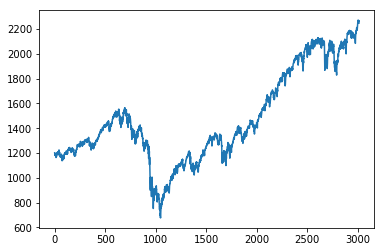

In [22]:
plt.plot(X[:,0])

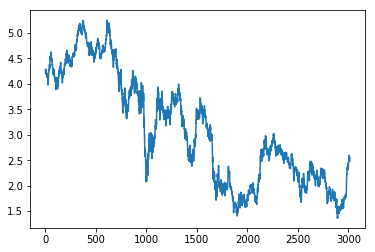

In [23]:
plt.plot(X[:,1])

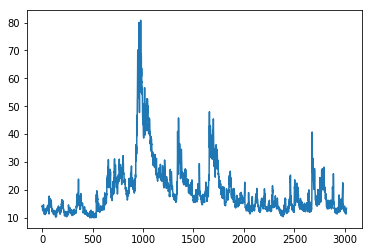

In [24]:
plt.plot(X[:,2])

# testing train_test_split.py

In [25]:
from train_test_split import utility_fun

In [26]:
temp = utility_fun([X, y], len_of_trainset = 2412, time_interval = 100)

temp.norm()
temp.sepera_time_step()
temp.test_train_split()
trainloader, validateData, trainData, testData = temp.build_dataloader()

In [27]:
trainData.shape
a = trainData.view(2412, -1, 4)

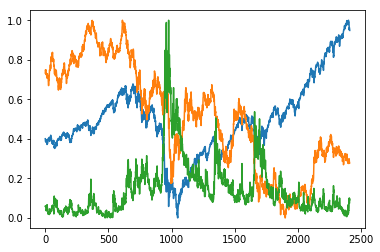

In [28]:
b = a[:,0,:]
plt.plot(b[:,0].numpy())
plt.plot(b[:,1].numpy())
plt.plot(b[:,2].numpy())

# Normalisation over train and test set

no need normalising the target

In [29]:
split_point = int(len(y) * 0.8)
y1 = y[:split_point]
y2 = y[split_point:]

X1 = X[:split_point,:]
X2 = X[split_point:,:]

# y1= (y1- min(y1))/(max(y1)- min(y1)) #??? normalsation
X1= (X1- np.min(X1,axis=0))/(np.max(X1, axis=0)-np.min(X1,axis=0))

# y2= (y2- min(y2))/(max(y2)- min(y2)) #??? normalsation
X2= (X2- np.min(X2,axis=0))/(np.max(X2, axis=0)-np.min(X2,axis=0))


X = np.concatenate((X1,X2) , axis = 0)
y = np.concatenate((y1,y2) , axis = 0)

print(X.shape, y.shape)

(3016, 4) (3016,)


In [30]:
print(X,'\n', y)

[[0.4007396  0.73257024 0.05903903 0.16863177]
 [0.39004159 0.74895942 0.05762998 0.56892133]
 [0.3867551  0.74739854 0.05917993 0.29415689]
 ...
 [0.99358375 0.94774347 0.02443162 0.54235091]
 [0.95074994 0.90261283 0.05700712 0.39921671]
 [0.94925908 0.87965162 0.0712589  0.42239873]] 
 [0. 0. 1. ... 0. 0. 0.]


# seperating time step

In [31]:
time_steps= 100 #1 to 100 days ahead
X_new= np.zeros((X.shape[0] - time_steps +1, time_steps, X.shape[1]))
y_new= np.zeros((y.shape[0] -time_steps +1,))
for ix in range(X_new.shape[0]):
    for jx in range(time_steps):
        X_new[ix, jx, :]= X[ix +jx, :]
    y_new[ix]= y[ix + time_steps -1]
print (X_new.shape, y_new.shape)

(2917, 100, 4) (2917,)


In [32]:
y_new

array([1., 1., 0., ..., 0., 0., 0.])

# seperating train and test set

In [33]:
split = split_point
X_train = X_new[:split]
X_test = X_new[split:]

y_train = y_new[:split]
y_test = y_new[split:]

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2412, 100, 4) (2412,)
(505, 100, 4) (505,)


In [34]:
lens = X_train.shape[0]
lens

2412

In [35]:
#convert to torch
trainData = torch.from_numpy(X_train)
testData = torch.from_numpy(y_train)
validateData = torch.from_numpy(X_test)
print(trainData.shape, testData.shape, validateData.shape)
# testData = testData.view(testData.shape[0],3,-1)

torch.Size([2412, 100, 4]) torch.Size([2412]) torch.Size([505, 100, 4])


In [36]:
trainData = trainData.view(lens,-1,time_steps,4)
testData = testData.view(lens,-1)

validateData = validateData.view(validateData.shape[0],-1,time_steps,4)
print(trainData.shape,testData.shape,validateData.shape)

torch.Size([2412, 1, 100, 4]) torch.Size([2412, 1]) torch.Size([505, 1, 100, 4])


# data loader

In [37]:
#reload tensordata
train = TensorDataset(trainData.view(lens, -1).float(), testData.view(-1).float())

trainloader = DataLoader(train, batch_size=2, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images)) 
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([2, 400])
torch.Size([2])


In [38]:
print(trainData.view(lens, -1).shape, testData.view(-1).shape)
print(type(trainData))

torch.Size([2412, 400]) torch.Size([2412])
<class 'torch.Tensor'>


# create model and training

In [43]:
class LSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=1):
        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = 0.2)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, x):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
#         print(x.shape)
        lstm_out, self.hidden = self.lstm(x.view(1, self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))
        out = F.sigmoid(y_pred.view(-1))
#         print(out)
        return out

    
lstm_input_size = 400
num_train = 2
output_dim = 1
num_layers = 1
h1 = 500

device = 'cpu'
model = LSTM(lstm_input_size, h1, batch_size=num_train, output_dim=output_dim, num_layers=num_layers).to(device)

print(model)

E:\anacoda\lib\site-packages\torch\nn\modules\rnn.py:54: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


LSTM(
  (lstm): LSTM(400, 500, dropout=0.2)
  (linear): Linear(in_features=500, out_features=1, bias=True)
)


In [44]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"


# define the loss function and the optimiser
# loss_function = nn.MSELoss()

#classification problem  we use bce loss
loss_function = nn.BCELoss()
optimiser = optim.Adam(model.parameters())

trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(trainloader)
trial.run(epochs=10)

E:\anacoda\lib\site-packages\torch\nn\functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[{'running_loss': 0.6938480734825134,
  'running_binary_acc': 0.5199999809265137,
  'loss': 0.6913497447967529,
  'binary_acc': 0.5468490719795227,
  'train_steps': 1206,
  'validation_steps': None},
 {'running_loss': 0.6789411306381226,
  'running_binary_acc': 0.5899999737739563,
  'loss': 0.6883653998374939,
  'binary_acc': 0.5534825921058655,
  'train_steps': 1206,
  'validation_steps': None},
 {'running_loss': 0.7015597224235535,
  'running_binary_acc': 0.5099999904632568,
  'loss': 0.6880313158035278,
  'binary_acc': 0.5534825921058655,
  'train_steps': 1206,
  'validation_steps': None},
 {'running_loss': 0.6948575377464294,
  'running_binary_acc': 0.5199999809265137,
  'loss': 0.6880803108215332,
  'binary_acc': 0.5534825921058655,
  'train_steps': 1206,
  'validation_steps': None},
 {'running_loss': 0.691098153591156,
  'running_binary_acc': 0.5399999618530273,
  'loss': 0.6880091428756714,
  'binary_acc': 0.5534825921058655,
  'train_steps': 1206,
  'validation_steps': None},
 

## slide window forecasting

In [ ]:
from train_test_split import utility_fun

#classification problem  we use bce loss
loss_function = nn.BCELoss()
optimiser = optim.Adam(model.parameters())
device = "cuda:0" if torch.cuda.is_available() else "cpu"
cor = 0
mis = 0
for i in range(2412, 3012):
    temp = utility_fun([X, y], len_of_trainset = i, time_interval = 300)

    temp.norm()
    temp.sepera_time_step()
    temp.test_train_split()
    trainloader, validateData,_ ,_ = temp.build_dataloader()

    model = BaselineModel(1200, 1500, 1)
     
    trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy'], verbose = False).to(device)
    trial.with_generators(trainloader)
    trial.run(epochs=1)
    
    y_pred= model(validateData.view(validateData.shape[0],-1)[0].to(device).float())
    if y_pred.data > 0.5:
        a = 1
    else:
        a = 0
    if a == y[i]:
        cor += 1
    else:
        mis += 1
        
    print("the {}th day, pred: {} ---- true: {} ====== correct: {} ---- miscorrect: {}".format(i, a, y[i],cor,mis))
    
#     print(y_pred.value())

In [ ]:
from train_test_split import utility_fun

#classification problem  we use bce loss
loss_function = nn.BCELoss()
optimiser = optim.SGD(model.parameters(),lr = 0.01)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
cor = 0
mis = 0
for i in range(2412, 3012):
    temp = utility_fun([X, y], len_of_trainset = i, time_interval = 100)

    temp.norm()
    temp.sepera_time_step()
    temp.test_train_split()
    trainloader, validateData = temp.build_dataloader()

    model = BaselineModel(400, 500, 1)
     
    trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy'], verbose = False).to(device)
    trial.with_generators(trainloader)
    trial.run(epochs=1)
    
    y_pred= model(validateData.view(validateData.shape[0],-1)[0].to(device).float())
    if y_pred.data > 0.5:
        a = 1
    else:
        a = 0
    if a == y[i]:
        cor += 1
    else:
        mis += 1
        
    print("the {}th day, pred: {} ---- true: {} ====== correct: {} ---- miscorrect: {}".format(i, a, y[i],cor,mis))
    
#     print(y_pred.value())

In [ ]:
from train_test_split import utility_fun

#classification problem  we use bce loss
loss_function = nn.BCELoss()
optimiser = optim.SGD(model.parameters(),lr = 0.01)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
cor = 0
mis = 0
for i in range(2412, 3012):
    temp = utility_fun([X, y], len_of_trainset = i, time_interval = 100)

    temp.norm()
    temp.sepera_time_step()
    temp.test_train_split()
    trainloader, validateData = temp.build_dataloader()

    model = BaselineModel(300, 500, 1)
     
    trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy'], verbose = False).to(device)
    trial.with_generators(trainloader)
    trial.run(epochs=1)
    
    y_pred= model(validateData.view(validateData.shape[0],-1)[0].to(device).float())
    if y_pred.data > 0.5:
        a = 1
    else:
        a = 0
    if a == y[i]:
        cor += 1
    else:
        mis += 1
        
    print("the {}th day, pred: {} ---- true: {} ====== correct: {} ---- miscorrect: {}".format(i, a, y[i],cor,mis))
    
#     print(y_pred.value())
    
    

## Adding noise condition

# generate gradient -- need change here

In [ ]:
class gradient_generator():
    
    def __init__(self, model):
        self.model = model.to('cpu')
        self.gradients = None
        # Put model in evaluation mode
        self.model.eval()
        # Hook the first layer to get the gradient
        self.hook = self.hook_layers()
    def hook_layers(self):    
        def hook_function(module, grad_in, grad_out):
#             print("hook called")
#             print(grad_out[0])
            self.gradients = grad_out[0]
        first_layer = list(self.model._modules.items())[0][1]
        hook = first_layer.register_forward_hook(hook_function)
        return hook
    def generate_gradient(self, inputs):
        self.model.zero_grad()
        _ = model(inputs)
        self.hook.remove()
        return self.gradients
    

grad = torch.zeros((2412,9))
i = 0
for data in trainloader:
    # get the inputs
    inputs, labels = data
    
    GG = gradient_generator(model)
    temp = GG.generate_gradient(inputs)
    grad[i,:] = temp
    i += 1

grad